In [ ]:
import pandas as pd

In [ ]:
URL='https://drive.google.com/uc?export=download&id=1iduWNMLWJkVX59vpeboA8oXp74tUKmO8'

In [ ]:
import requests
response = requests.get(URL)

In [ ]:
response.url

'https://doc-08-7g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pvbt639pda58bpkmm56kdcdm2utrf5cj/1610238150000/00373072729262931595/*/1iduWNMLWJkVX59vpeboA8oXp74tUKmO8?e=download'

In [ ]:
response.text

'i didnt feel humiliated;sadness\ni can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness\nim grabbing a minute to post i feel greedy wrong;anger\ni am ever feeling nostalgic about the fireplace i will know that it is still on the property;love\ni am feeling grouchy;anger\nive been feeling a little burdened lately wasnt sure why that was;sadness\nive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise\ni feel as confused about life as a teenager or as jaded as a year old man;fear\ni have been with petronas for years i feel that petronas has performed well and made a huge profit;joy\ni feel romantic too;love\ni feel like i have to make the suffering i m seeing mean something;sadness\ni do feel that running is a divine experience and that i can expect to have some type of spiritual encounter;joy\ni think it s the easiest time of year to feel dissatisfie

In [ ]:
response.encoding

'ISO-8859-1'

In [ ]:
data = response.text

In [ ]:
data.splitlines()

['i didnt feel humiliated;sadness',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness',
 'im grabbing a minute to post i feel greedy wrong;anger',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love',
 'i am feeling grouchy;anger',
 'ive been feeling a little burdened lately wasnt sure why that was;sadness',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise',
 'i feel as confused about life as a teenager or as jaded as a year old man;fear',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit;joy',
 'i feel romantic too;love',
 'i feel like i have to make the suffering i m seeing mean something;sadness',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter;joy',
 'i think it s the eas

In [ ]:
for i, line in enumerate(data.split('\n')):
    print(f'{i}   {line}')

Streaming output truncated to the last 5000 lines.
11001   im feeling a little regretful but itll pass because thats what happens with regret;sadness
11002   i feel stressed frequently;anger
11003   i can feel the awkwardness and that weird kind of tension;fear
11004   i know i just ended a very big giveaway here on the muse but im still feeling quite generous;love
11005   i love getting out the decorations and feeling festive i am happy to put them away;joy
11006   i point these things out so as to make clear that i went into this film with the best intentions but left feeling irritated confused and wore out;anger
11007   i feel so heartbroken and confused and just blah blah blah;sadness
11008   i guess you could say i am a loner but i feel more lonely in a crowed room with boring people than i feel on my own;sadness
11009   i don t feel like i m a valuable person;joy
11010   i usually start feeling anxious;fear
11011   i am thankful for the opportunity to help others feel better abou

In [ ]:
len(data.splitlines())

16000

In [ ]:
len(data.split('\n'))

16001

In [ ]:
ID=[]
Text=[]
Label=[]
for i, line in enumerate(data.split('\n')[:-1]):
  try: 
    Label.append(line.split(';')[1])
    Text.append(line.split(';')[0])
    ID.append(i)
  except:
    continue

In [ ]:
ID=[]
Text=[]
Label=[]
for i, line in enumerate(data.splitlines()):
  try: 
    Label.append(line.split(';')[1])
    Text.append(line.split(';')[0])
    ID.append(i)

  except:
    continue



In [ ]:
ID=[]
Text=[]
Label=[]
for i, line in enumerate(data.split('\n')[:-1]):
    Label.append(line.split(';')[1])
    Text.append(line.split(';')[0])
    ID.append(i)


Reshape the data by building Dict.

In [ ]:
import pandas as pd 

DF_emotions=pd.DataFrame({'ID':ID, 'Text':Text,'Label':Label})

Data transform to pkl.

In [ ]:
DF_emotions.to_pickle('EmotionData.pkl')

In [ ]:
DF_emotions

ID                                               Text    Label
0          0                            i didnt feel humiliated  sadness
1          1  i can go from feeling so hopeless to so damned...  sadness
2          2   im grabbing a minute to post i feel greedy wrong    anger
3          3  i am ever feeling nostalgic about the fireplac...     love
4          4                               i am feeling grouchy    anger
...      ...                                                ...      ...
15995  15995  i just had a very brief time in the beanbag an...  sadness
15996  15996  i am now turning and i feel pathetic that i am...  sadness
15997  15997                     i feel strong and good overall      joy
15998  15998  i feel like this was such a rude comment and i...    anger
15999  15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 3 columns]

In [ ]:
DF_emotions.to_csv('DF_emotionsFull.csv')

https://github.com/amueller/word_cloud

In [ ]:
!pip install wordcloud


In [ ]:
DF_emotions.Label.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
DF_emotions_label_unique=DF_emotions.Label.unique()

Remeber unique numerical case

In [ ]:
import numpy as np 
list1 = [10, 20, 10, 30, 40, 40] 
np.unique(list1) 

array([10, 20, 30, 40])

Text corresponds to Sadness

In [ ]:
Sad_DF=DF_emotions[DF_emotions['Label']=='sadness']['Text']

In [ ]:
Sad_DF.to_csv('DF_emotions_sadness.csv')

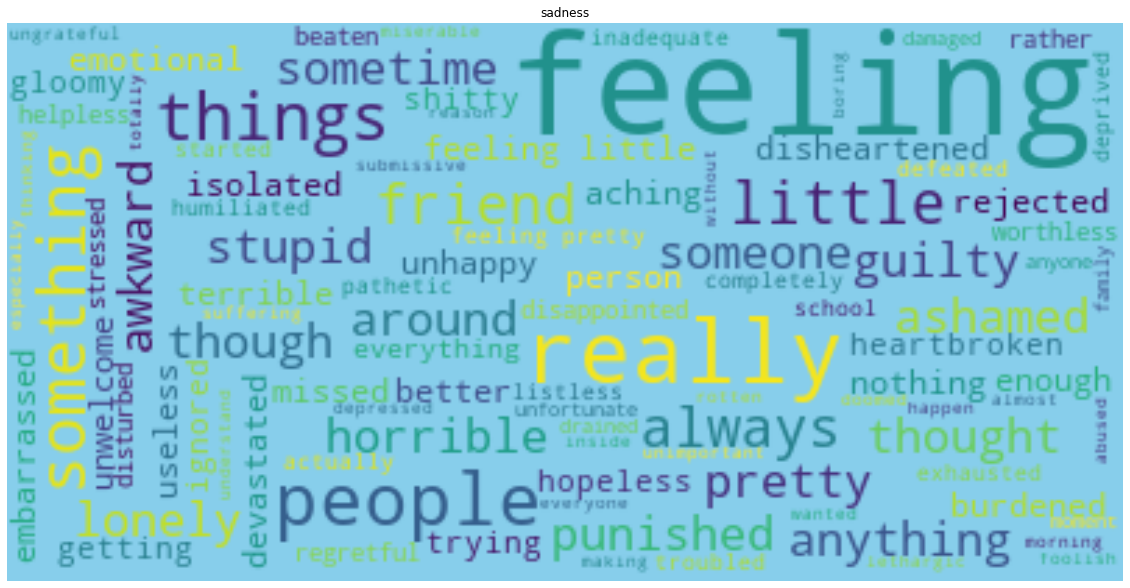

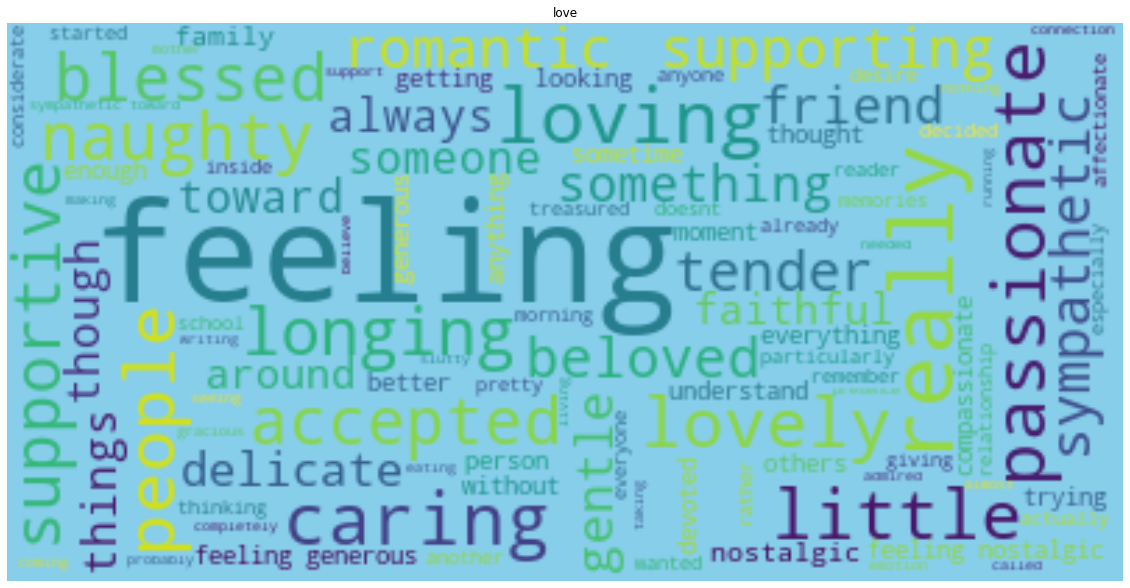

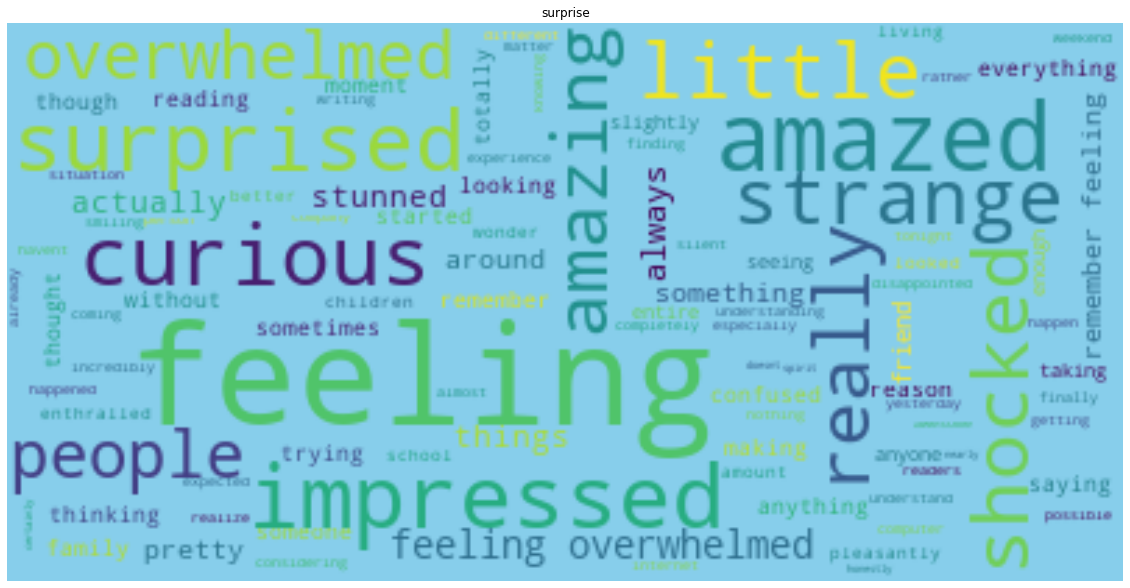

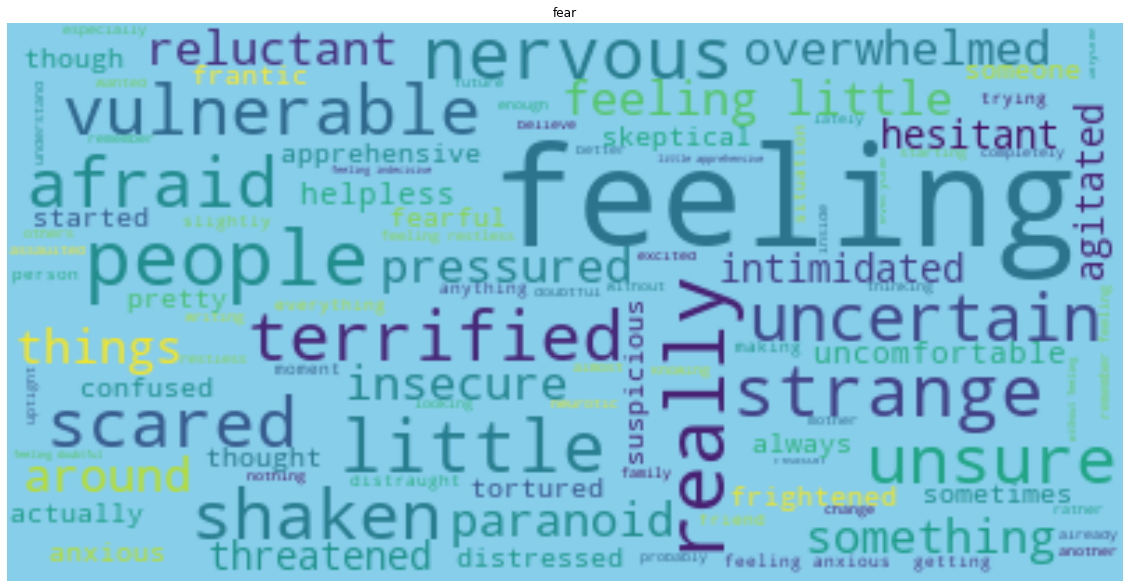

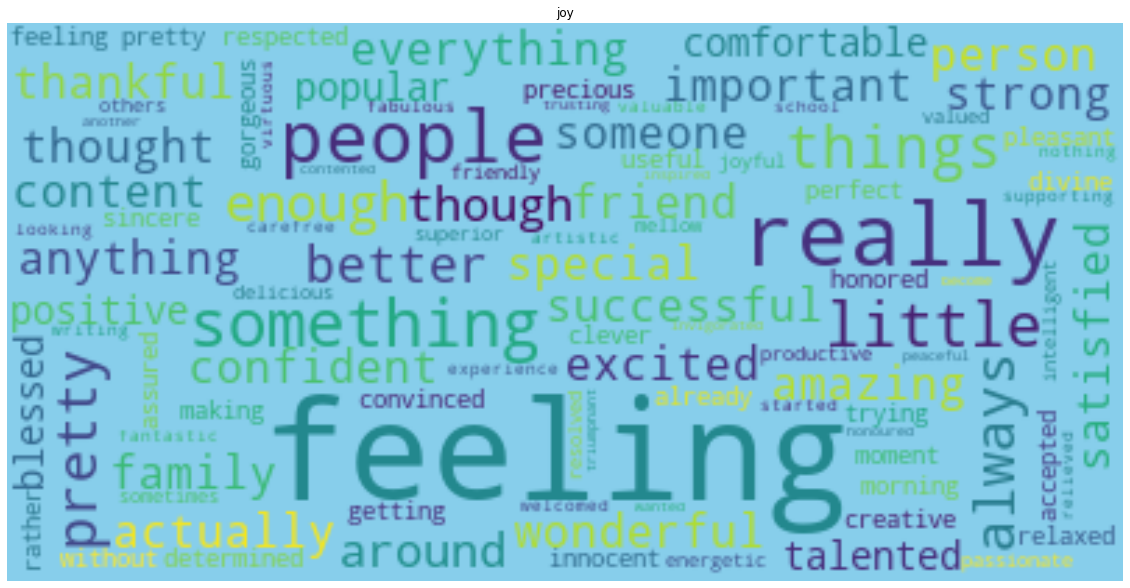

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for emotion in DF_emotions.Label.unique():
  #emotion='joy'
  if emotion=='anger':
    continue
  Data=' '.join(DF_emotions[DF_emotions['Label']==emotion]['Text'].values)
  stops=['the','and','that','for','with','this','for','was','you','about']
  tokens =[word.lower() for word in Data.split() if len(word)>5 and word.lower() not in stops ]
  Data=' '.join(tokens)


  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="skyblue").generate(Data)
  plt.figure(figsize=(20,20))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.title(emotion)
  plt.show()

Extract emotion joy!

In [ ]:
emotion='joy'
Data=' '.join(DF_emotions[DF_emotions['Label']==emotion]['Text'].values)


In [ ]:
DF_emotions['Text_Len']=DF_emotions['Text'].apply(len)

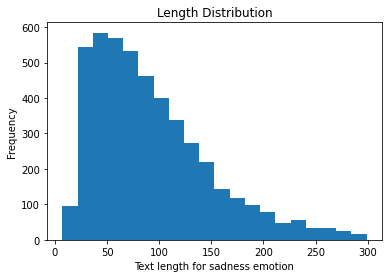

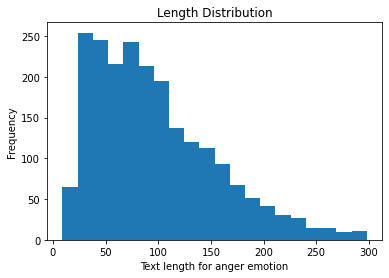

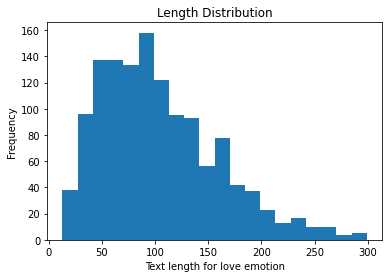

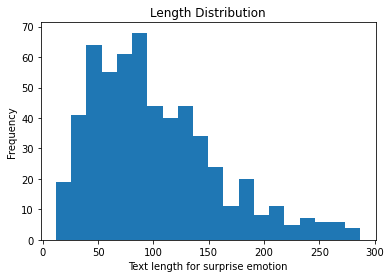

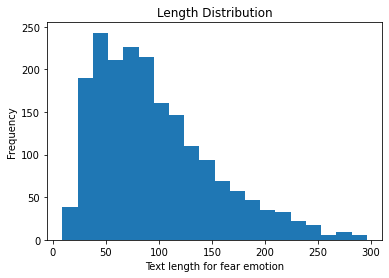

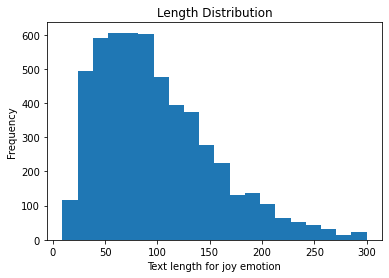

In [ ]:
for emotion in DF_emotions.Label.unique():
  DF_emotions[DF_emotions.Label==emotion]['Text_Len'].plot(
      kind='hist',

      bins=20,
      title='Length Distribution')
  plt.xlabel(f'Text length for {emotion} emotion')
  plt.show()

In [ ]:
from collections import Counter
# to count the most used


In [ ]:
#Lets take joy class again
emotion='joy'
Data=' '.join(DF_emotions[DF_emotions['Label']==emotion]['Text'].values)


In [ ]:
stops=['the','and','that','for','with','this','for','was','you','about']
tokens =[word.lower() for word in Data.split() if len(word)>6 and word.lower() not in stops ]
dictWords=Counter(tokens).most_common(5)

In [ ]:
dictWords

[('feeling', 1539),
 ('because', 323),
 ('something', 193),
 ('through', 107),
 ('feelings', 99)]

Building DF

In [ ]:
Words=[i[0] for i in dictWords]
Freq=[i[1] for i in dictWords]
import pandas as pd

DF=pd.DataFrame({'Word':Words,'Freq':Freq})
DF

Word  Freq
0    feeling  1539
1    because   323
2  something   193
3    through   107
4   feelings    99

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 


Text(0.5, 1.0, 'Most frequent words for joy emaotion')

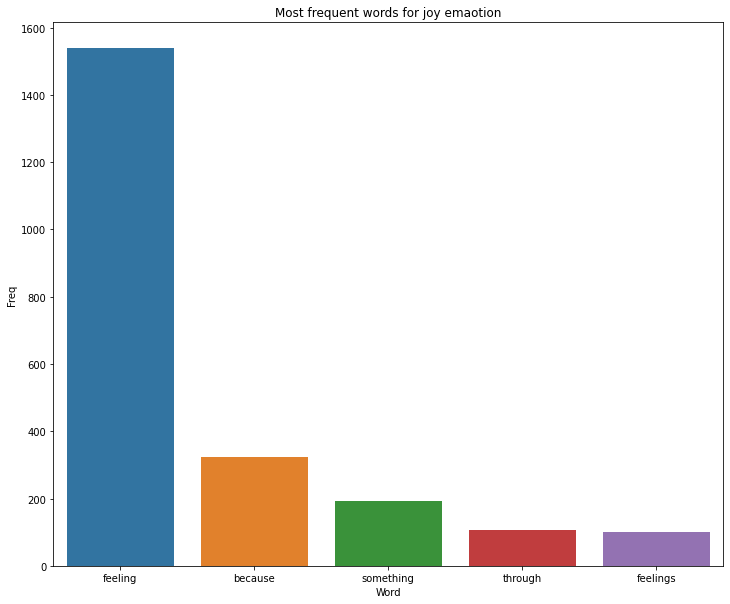

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=DF['Word'][0:10],y=DF['Freq'][0:10])
plt.title(f'Most frequent words for {emotion} emaotion')

Lets update our stop words

In [ ]:
stops=['the','and','that','for','with','this','for','was','you','about', 'because', 'feeling','something', 'through', 'feelings', 'everything']
tokens =[word.lower() for word in Data.split() if len(word)>6 and word.lower() not in stops ]
dictWords=Counter(tokens).most_common(5)

In [ ]:
Words=[i[0] for i in dictWords]
Freq=[i[1] for i in dictWords]
import pandas as pd

DF=pd.DataFrame({'Word':Words,'Freq':Freq})
DF

Word  Freq
0  important    87
1    excited    86
2   thankful    78
3   anything    73
4  confident    73

Text(0.5, 1.0, 'Most frequent words for joy emaotion')

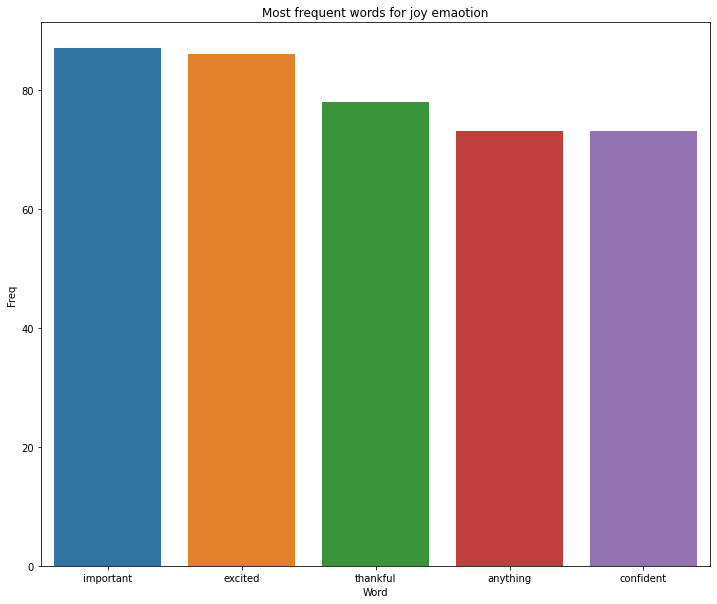

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=DF['Word'][0:10],y=DF['Freq'][0:10])
plt.title(f'Most frequent words for {emotion} emaotion')

<p><img alt="Colaboratory logo" height="30px" src="/img/colab_favicon.ico" 
align="left" hspace="10px" vspace="0px"></p>

**HnadsOn**: 
* Extract the your version of this project from Github.
* update the notebook with your own contribution and push to Github


In [73]:
!git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [74]:
!git init

Initialized empty Git repository in /content/.git/


### Emotions are something that is very important for us to know the condition of the person you are dealing with. But there is one of the problems that we as data analysts try to solve is how to predict the emotions of a person, whether he is happy, sad, enjoyable, etc.





The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.


1.   Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?
2.   Did you define the metric for success before beginning?
3. Did you consider whether the question could be answered with the available data?



# here we will download the important library

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.optimizers import Adam , SGD
from keras.utils.np_utils import to_categorical
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

lets read the data and display some information about it



In [66]:
data = pd.read_csv('DF_emotionsFull.csv' , encoding='utf-8')
data.head()

Unnamed: 0  ID                                               Text    Label
0           0   0                            i didnt feel humiliated  sadness
1           1   1  i can go from feeling so hopeless to so damned...  sadness
2           2   2   im grabbing a minute to post i feel greedy wrong    anger
3           3   3  i am ever feeling nostalgic about the fireplac...     love
4           4   4                               i am feeling grouchy    anger

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16000 non-null  int64 
 1   ID          16000 non-null  int64 
 2   Text        16000 non-null  object
 3   Label       16000 non-null  object
dtypes: int64(2), object(2)
memory usage: 500.1+ KB


In [68]:
pd.DataFrame(data['Label'].unique())

0
0   sadness
1     anger
2      love
3  surprise
4      fear
5       joy

In [69]:
data.describe()

Unnamed: 0            ID
count  16000.000000  16000.000000
mean    7999.500000   7999.500000
std     4618.946489   4618.946489
min        0.000000      0.000000
25%     3999.750000   3999.750000
50%     7999.500000   7999.500000
75%    11999.250000  11999.250000
max    15999.000000  15999.000000

let's check if we have any null or NaN values


In [70]:
data.isnull().sum().sum()

0

In [71]:
data.isna().sum().sum()

0

# And here we will do some visualization

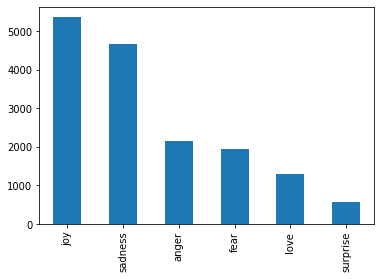

In [45]:
data['Label'].value_counts().plot.bar()

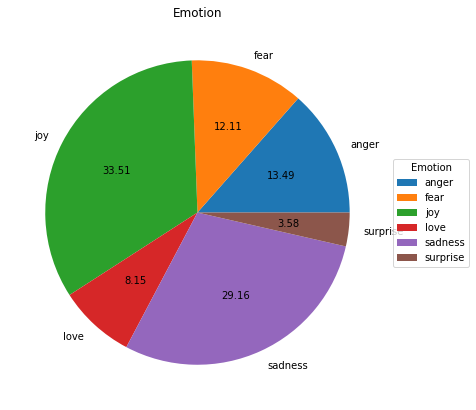

In [46]:
plt.figure(figsize=(7,7))
data.groupby('Label').size().plot.pie(autopct='%.2f')
plt.title('Emotion')
plt.ylabel('')
plt.legend( title="Emotion", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

In [45]:
from sklearn import preprocessing
for column in data.columns:
    if data[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [46]:
X = data[['ID','Text']]
y = data['Label']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
X=data['Text']

In [48]:
lst=[]
for i in X:
  lst.append(len(i))

In [49]:
len1=pd.DataFrame(lst)
len1.describe()

0
count  16000.000000
mean      96.845812
std       55.904953
min        7.000000
25%       53.000000
50%       86.000000
75%      129.000000
max      300.000000

In [51]:
cts=[]
for i in range(7,301):
   ct=0
   for k in lst:
     if k==i:
       ct+=1
   cts.append(ct)

In [52]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [53]:
len(tokenizer.word_index)

15213

In [54]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [55]:
data['Label']=data.Label.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [56]:
Y_train=data['Label'].values

In [57]:
Y_train_f=to_categorical(Y_train)

In [58]:
Y_train_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [64]:
X_val=data['Text']
Y_val=data.Label.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

TypeError: ignored